In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary with sample data
data = {
    'Hours Studied': [5, 3, 7, 4, 6, 8, 2, 5, 7, 9],
    'Attendance': [90, 75, 95, 80, 88, 92, 60, 85, 93, 98],
    'Pass/Fail': ['1', '0', '1', '1', '0', '1', '0', '1', '0', '1']
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('student_performance.csv', index=False)

In [108]:
performance_data = pd.read_csv('student_performance.csv')
features = performance_data[['Hours Studied', 'Attendance']]

# Access the target column directly from the DataFrame
target = performance_data['Pass/Fail']

# You already have the data loaded into performance_data,
# there is no need to create a new DataFrame 'df' in this way.
# If you intended to separate features and target, the above lines achieve that.
# If you just want to display the head of the loaded DataFrame,
# you can simply call performance_data.head()
df=performance_data
df.head()

,Hours Studied,Attendance,Pass/Fail
0,5,90,1
1,3,75,0
2,7,95,1
3,4,80,1
4,6,88,0


In [109]:
df.tail()

,Hours Studied,Attendance,Pass/Fail
5,8,92,1
6,2,60,0
7,5,85,1
8,7,93,0
9,9,98,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours Studied  10 non-null     int64
 1   Attendance     10 non-null     int64
 2   Pass/Fail      10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [111]:
df.describe()

,Hours Studied,Attendance,Pass/Fail
count,10.000000,10.000000,10.000000
mean,5.600000,85.600000,0.600000
std,2.221111,11.364663,0.516398
min,2.000000,60.000000,0.000000
25%,4.250000,81.250000,0.000000
50%,5.500000,89.000000,1.000000
75%,7.000000,92.750000,1.000000
max,9.000000,98.000000,1.000000


In [112]:
corr=df.corr()
corr

,Hours Studied,Attendance,Pass/Fail
Hours Studied,1.000000,0.917336,0.426241
Attendance,0.917336,1.000000,0.499828
Pass/Fail,0.426241,0.499828,1.000000


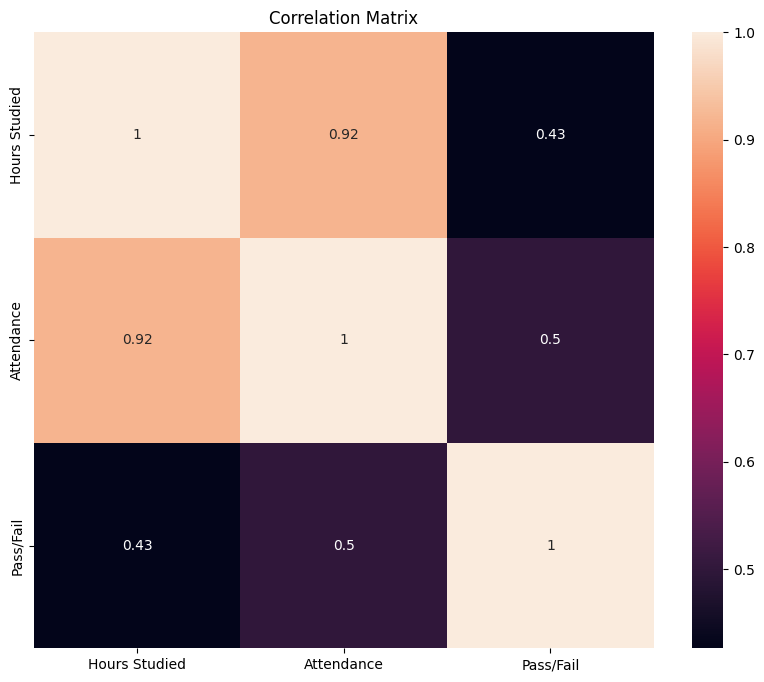

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [114]:
#Preprocess the data
# Combine the features (df) and the target variable (target_df) for splitting
# Alternatively, you can keep them separate and pass both to train_test_split
# X = df # Features
# y = target_df['target'] # Target variable (as a Series or array)

from sklearn.model_selection import train_test_split

# Use the already defined features (X) and target (y) for splitting
X = features # Features DataFrame
y = target # Target Series

# Split the data into training and testing sets
# The test_size and random_state are good additions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can then print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8, 2)
Shape of X_test: (2, 2)
Shape of y_train: (8,)
Shape of y_test: (2,)


In [115]:
#Train the model
#import logistic regression
from sklearn.linear_model import LogisticRegression

# Instantiate the DecisionTreeClassifier
# You can optionally specify parameters like criterion, max_depth, etc.
model = LogisticRegression(random_state=42) # Added random_state for reproducibility

# Train the DecisionTreeClassifier model
model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

# Make predictions using the test data
y_pred = model.predict(X_test)

print("\nPredictions made on the test data.")

Decision Tree model trained successfully.

Predictions made on the test data.


Accuracy: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2


Confusion Matrix:
[[1 1]
 [0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


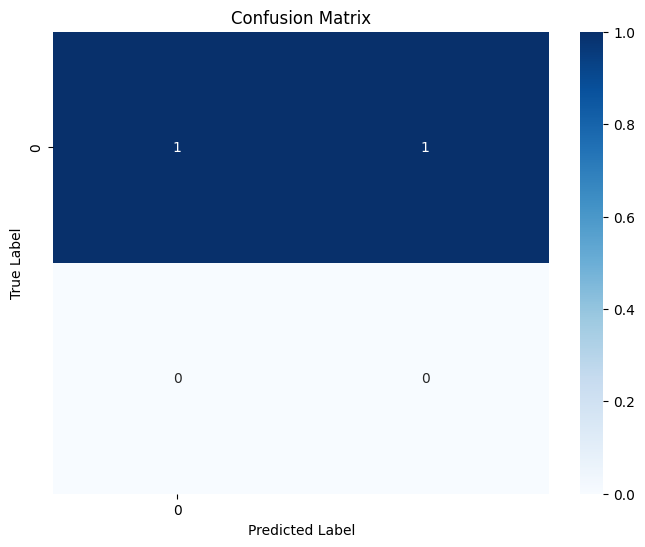

In [116]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique class labels from the target variable
# Sort them to ensure consistent ordering with the confusion matrix
class_labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
# Use the actual class labels for xticklabels and yticklabels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [117]:
# Create a dictionary for the new data
new_data = {
    'Hours Studied': [6, 3, 9],
    'Attendance': [92, 78, 99]
}

# Create a pandas DataFrame for the new data
new_df = pd.DataFrame(new_data)

# Predict the 'Pass/Fail' for the new data
predictions = model.predict(new_df)

# Print the predictions
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[1 1 1]


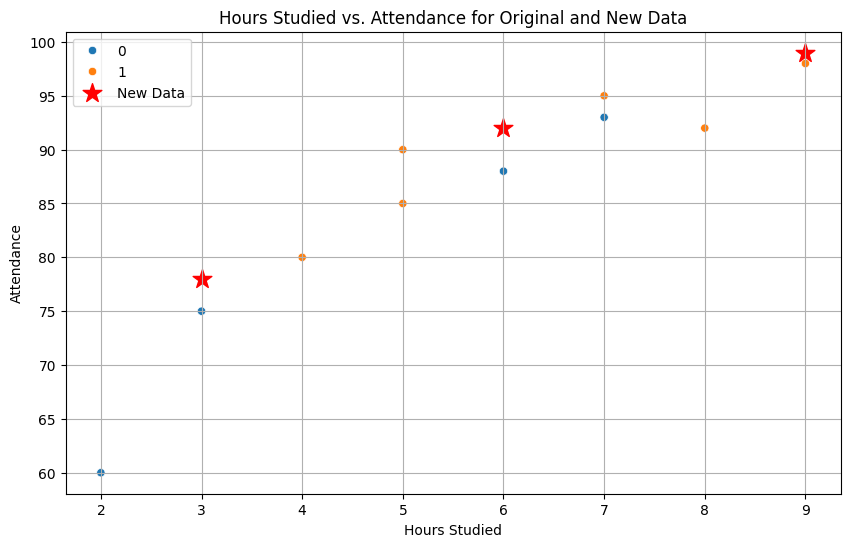

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for DataFrame operations

# Assuming 'performance_data' contains your original data
# Assuming 'new_df' contains your new data

plt.figure(figsize=(10, 6))

# Plot the original data
# You can color the points based on the 'Pass/Fail' status if you want to see the class distribution
# Removed the conflicting 'label' argument, hue will automatically create the legend
sns.scatterplot(data=performance_data, x='Hours Studied', y='Attendance', hue='Pass/Fail')

# Plot the new data
# Use a different marker and color to distinguish the new data points
plt.scatter(new_df['Hours Studied'], new_df['Attendance'], color='red', marker='*', s=200, label='New Data')

plt.title('Hours Studied vs. Attendance for Original and New Data')
plt.xlabel('Hours Studied')
plt.ylabel('Attendance')
plt.legend() # This will now correctly combine the legend from hue and the new data label
plt.grid(True)
plt.show()

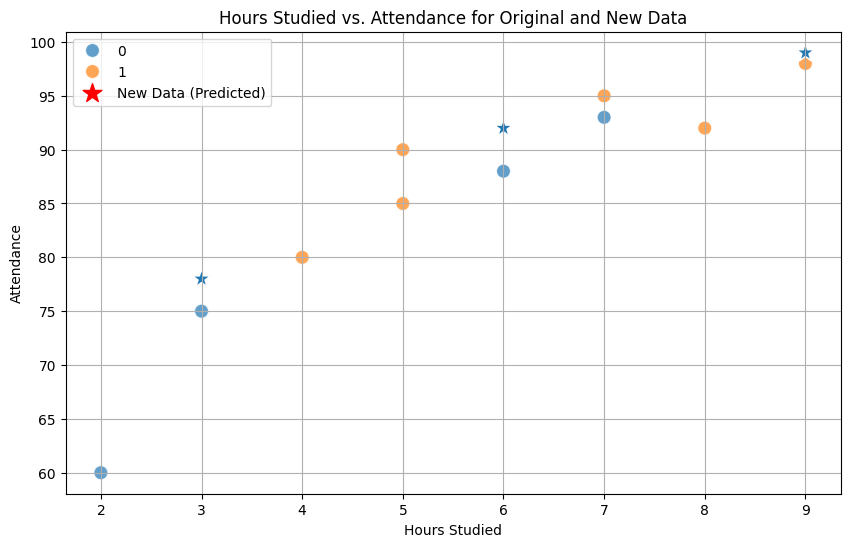

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for DataFrame operations

# Assuming 'performance_data' contains your original data
# Assuming 'new_df' contains your new data
# Assuming 'predictions' contains the predicted Pass/Fail status for new_df

# Add the predictions to the new_df DataFrame
new_df['Predicted Pass/Fail'] = predictions

plt.figure(figsize=(10, 6))

# Plot the original data with hue based on actual 'Pass/Fail'
sns.scatterplot(data=performance_data, x='Hours Studied', y='Attendance', hue='Pass/Fail', s=100, alpha=0.7)

# Plot the new data with hue based on 'Predicted Pass/Fail'
# Use a different marker to distinguish them
sns.scatterplot(data=new_df, x='Hours Studied', y='Attendance', hue='Predicted Pass/Fail', marker='*', s=200, color='red', legend=False) # Plot new data with red color and star marker

# Manually create a legend entry for the new data type
# This is to differentiate the marker type
plt.scatter([], [], color='red', marker='*', s=200, label='New Data (Predicted)')


plt.title('Hours Studied vs. Attendance for Original and New Data')
plt.xlabel('Hours Studied')
plt.ylabel('Attendance')
plt.legend() # This will combine the legends
plt.grid(True)
plt.show()